In [1]:
import numpy as np
import pandas as pd

In [2]:
# !pip install openpyxl

In [3]:
df=pd.read_excel('/kaggle/input/indian-disaster-dataset/disasterIND.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     783 non-null    object 
 1   Historic                                   783 non-null    object 
 2   Classification Key                         783 non-null    object 
 3   Disaster Group                             783 non-null    object 
 4   Disaster Subgroup                          783 non-null    object 
 5   Disaster Type                              783 non-null    object 
 6   Disaster Subtype                           783 non-null    object 
 7   External IDs                               58 non-null     object 
 8   Event Name                                 93 non-null     object 
 9   ISO                                        783 non-null    object 
 10  Country                   

In [5]:
df.sample(5)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
601,2013-0140-IND,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:EQ-2013-000056|USGS:usb000gjhz,NaN,IND,...,NaN,NaN,NaN,NaN,120000.0,156957.0,76.454146,"[{""adm2_code"":72809,""adm2_name"":""Administrativ...",2013-07-05,2023-09-25
681,2017-0569-IND,No,nat-met-sto-lig,Natural,Meteorological,Storm,Lightning/Thunderstorms,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,80.445779,"[{""adm2_code"":17618,""adm2_name"":""Pashchim Cham...",2018-04-12,2023-09-25
133,1978-0074-IND,Yes,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,21.408917,NaN,2003-07-01,2023-09-25
346,1998-0106-IND,Yes,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,IND,...,NaN,NaN,NaN,NaN,10000.0,18692.0,53.497681,NaN,2003-07-01,2023-09-25
738,2021-0419-IND,No,nat-hyd-mmw-lan,Natural,Hydrological,Mass movement (wet),Landslide (wet),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,88.929493,"[{""adm2_code"":70183,""adm2_name"":""Mumbai Suburb...",2021-07-19,2023-09-25


In [6]:
#Empty Percentage and dropping If>25%
nullinfo=(df.isnull().sum()/df.shape[0])*100

In [7]:
nullinfo

DisNo.                                         0.000000
Historic                                       0.000000
Classification Key                             0.000000
Disaster Group                                 0.000000
Disaster Subgroup                              0.000000
Disaster Type                                  0.000000
Disaster Subtype                               0.000000
External IDs                                  92.592593
Event Name                                    88.122605
ISO                                            0.000000
Country                                        0.000000
Subregion                                      0.000000
Region                                         0.000000
Location                                       6.385696
Origin                                        72.030651
Associated Types                              82.630907
OFDA/BHA Response                              0.000000
Appeal                                         0

In [8]:
df['Disaster Subgroup'].unique()

array(['Climatological', 'Geophysical', 'Biological', 'Meteorological',
       'Hydrological'], dtype=object)

In [9]:
df['Disaster Type'].unique()

array(['Drought', 'Earthquake', 'Epidemic', 'Storm', 'Flood',
       'Mass movement (wet)', 'Extreme temperature', 'Wildfire',
       'Mass movement (dry)', 'Infestation',
       'Glacial lake outburst flood'], dtype=object)

In [10]:
# drought_df = df[df['Disaster Type'] == 'Drought']

In [11]:
# drought_df.isnull().sum()

In [12]:
# drought_df.shape

In [13]:
import matplotlib.pyplot as plt

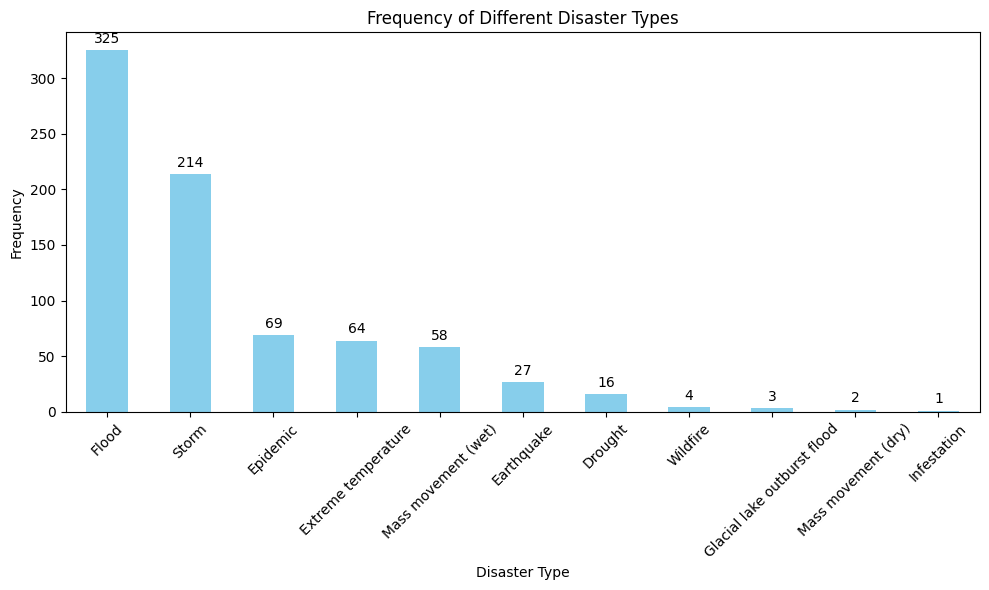

In [14]:
def plot_type(df):
    disaster_counts = df['Disaster Type'].value_counts()
    
    plt.figure(figsize=(10,6))
    bars=disaster_counts.plot(kind='bar', color='skyblue')

    plt.xlabel('Disaster Type')
    plt.ylabel('Frequency')
    plt.title('Frequency of Different Disaster Types')

    # Annotate the bars with the counts
    for bar in bars.containers[0]:
        height = bar.get_height()
        plt.annotate(f'{height}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # Offset the text a little bit
                     textcoords="offset points",
                     ha='center', va='bottom')
        
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_type(df)

In [15]:
# counts = df['Disaster Type'].value_counts()
# # Get disaster types that occur more than 5 times
# common_disasters = counts[counts > 5].index
# # Filter the DataFrame to include only these disaster types
# df = df[df['Disaster Type'].isin(common_disasters)]

In [16]:
df['Disaster Type'].value_counts()

Disaster Type
Flood                          325
Storm                          214
Epidemic                        69
Extreme temperature             64
Mass movement (wet)             58
Earthquake                      27
Drought                         16
Wildfire                         4
Glacial lake outburst flood      3
Mass movement (dry)              2
Infestation                      1
Name: count, dtype: int64

In [17]:
df['OFDA/BHA Response'].value_counts()

OFDA/BHA Response
No     732
Yes     51
Name: count, dtype: int64

In [18]:
df['Appeal'].value_counts()

Appeal
No    783
Name: count, dtype: int64

In [19]:
df['Declaration'].value_counts()

Declaration
No     776
Yes      7
Name: count, dtype: int64

In [20]:
emp=df[["Reconstruction Costs ('000 US$)","Reconstruction Costs, Adjusted ('000 US$)","External IDs","AID Contribution ('000 US$)","Insured Damage ('000 US$)","Insured Damage, Adjusted ('000 US$)","Origin","Associated Types"]]

In [21]:
irelev=df[["Historic","External IDs","Event Name","ISO","Country","Subregion","Region","Appeal"]]

In [22]:
col=irelev+emp
df=df.drop(columns=col,axis=0)

In [23]:
df

,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location,OFDA/BHA Response,Declaration,Magnitude,...,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-9001-IND,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Bengal,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2006-12-01,2023-09-25
1,1905-0003-IND,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,Kangra,No,No,7.8,...,NaN,NaN,NaN,NaN,25000.0,847777.0,2.948887,NaN,2003-07-01,2023-09-25
2,1907-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.058105,NaN,2003-07-01,2023-09-25
3,1916-0004-IND,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,"Cuddalore, Pondicherry",No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.576717,NaN,2003-07-01,2023-09-25
4,1920-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.562784,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2024-0399-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Assam and Meghalaya states,No,No,NaN,...,NaN,2100000.0,NaN,2100000.0,NaN,NaN,NaN,NaN,2024-06-21,2024-07-18
779,2024-0481-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Pratapgarh, Sultanpur, Chandauli, Mainpuri, P...",No,No,NaN,...,20.0,1000000.0,NaN,1000020.0,NaN,NaN,NaN,NaN,2024-07-15,2024-07-23
780,2024-0561-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Mandi, Kullu, Shimla districts (Himachal Pradesh)",No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,2024-08-23
781,2024-0624-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Tripura state,No,No,NaN,...,NaN,34000.0,NaN,34000.0,NaN,NaN,NaN,NaN,2024-08-23,2024-08-23


In [24]:
nullinfo=(df.isnull().sum()/df.shape[0])*100

In [25]:
nullinfo

DisNo.                                0.000000
Classification Key                    0.000000
Disaster Group                        0.000000
Disaster Subgroup                     0.000000
Disaster Type                         0.000000
Disaster Subtype                      0.000000
Location                              6.385696
OFDA/BHA Response                     0.000000
Declaration                           0.000000
Magnitude                            72.286079
Magnitude Scale                      11.238825
Latitude                             88.122605
Longitude                            88.122605
River Basin                          89.272031
Start Year                            0.000000
Start Month                           1.915709
Start Day                            24.904215
End Year                              0.000000
End Month                             2.554278
End Day                              24.776501
Total Deaths                          8.429119
No. Injured  

In [26]:
def date_filling(df):
    df['End Month'] = df['End Month'].fillna(df['Start Month'])
    df['End Day'] = df['End Day'].fillna(df['Start Day'])
    df['End Year'] = df['End Year'].fillna(df['Start Year'])
    
    df['Start Month'] = df['Start Month'].fillna(df['End Month'])
    df['Start Day'] = df['Start Day'].fillna(df['End Day'])
    df['Start Year'] = df['Start Year'].fillna(df['End Year'])

    date_columns = ['Start Year', 'Start Month', 'Start Day', 
                    'End Year', 'End Month', 'End Day']
    df[date_columns] = df[date_columns].fillna(1)
    df[date_columns] = df[date_columns].astype(int)
    return df

df=date_filling(df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DisNo.                             783 non-null    object 
 1   Classification Key                 783 non-null    object 
 2   Disaster Group                     783 non-null    object 
 3   Disaster Subgroup                  783 non-null    object 
 4   Disaster Type                      783 non-null    object 
 5   Disaster Subtype                   783 non-null    object 
 6   Location                           733 non-null    object 
 7   OFDA/BHA Response                  783 non-null    object 
 8   Declaration                        783 non-null    object 
 9   Magnitude                          217 non-null    float64
 10  Magnitude Scale                    695 non-null    object 
 11  Latitude                           93 non-null     float64

In [28]:
df

,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location,OFDA/BHA Response,Declaration,Magnitude,...,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-9001-IND,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Bengal,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,2006-12-01,2023-09-25
1,1905-0003-IND,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,Kangra,No,No,7.8,...,NaN,NaN,NaN,NaN,25000.0,847777.0,2.948887,NaN,2003-07-01,2023-09-25
2,1907-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.058105,NaN,2003-07-01,2023-09-25
3,1916-0004-IND,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,"Cuddalore, Pondicherry",No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.576717,NaN,2003-07-01,2023-09-25
4,1920-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.562784,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2024-0399-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Assam and Meghalaya states,No,No,NaN,...,NaN,2100000.0,NaN,2100000.0,NaN,NaN,NaN,NaN,2024-06-21,2024-07-18
779,2024-0481-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Pratapgarh, Sultanpur, Chandauli, Mainpuri, P...",No,No,NaN,...,20.0,1000000.0,NaN,1000020.0,NaN,NaN,NaN,NaN,2024-07-15,2024-07-23
780,2024-0561-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Mandi, Kullu, Shimla districts (Himachal Pradesh)",No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-01,2024-08-23
781,2024-0624-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Tripura state,No,No,NaN,...,NaN,34000.0,NaN,34000.0,NaN,NaN,NaN,NaN,2024-08-23,2024-08-23


In [29]:
date_columns = ['Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day']

In [30]:
df[date_columns]


,Start Year,Start Month,Start Day,End Year,End Month,End Day
0,1900,1,1,1900,1,1
1,1905,4,4,1905,4,4
2,1907,1,1,1907,1,1
3,1916,11,21,1916,11,21
4,1920,1,1,1920,1,1
...,...,...,...,...,...,...
778,2024,5,8,2024,7,8
779,2024,7,9,2024,7,15
780,2024,7,31,2024,8,23
781,2024,8,19,2024,8,23


In [31]:
df['Start Date'] = pd.to_datetime(df[['Start Year', 'Start Month', 'Start Day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')
df['End Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

In [32]:
df['Days Difference'] = (df['End Date'] - df['Start Date']).dt.days

In [33]:
df=df.drop(columns=['Start Date','End Date','Start Day','End Year','End Month','End Day','Entry Date','Last Update'])

In [34]:
df

,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location,OFDA/BHA Response,Declaration,Magnitude,...,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Days Difference
0,1900-9001-IND,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Bengal,No,No,NaN,...,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.730451,NaN,0
1,1905-0003-IND,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,Kangra,No,No,7.8,...,20000.0,NaN,NaN,NaN,NaN,25000.0,847777.0,2.948887,NaN,0
2,1907-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,1300000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.058105,NaN,0
3,1916-0004-IND,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,"Cuddalore, Pondicherry",No,No,NaN,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,3.576717,NaN,0
4,1920-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,NaN,No,No,NaN,...,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,6.562784,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2024-0399-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Assam and Meghalaya states,No,No,NaN,...,48.0,NaN,2100000.0,NaN,2100000.0,NaN,NaN,NaN,NaN,61
779,2024-0481-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Pratapgarh, Sultanpur, Chandauli, Mainpuri, P...",No,No,NaN,...,125.0,20.0,1000000.0,NaN,1000020.0,NaN,NaN,NaN,NaN,6
780,2024-0561-IND,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),"Mandi, Kullu, Shimla districts (Himachal Pradesh)",No,No,NaN,...,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
781,2024-0624-IND,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,Tripura state,No,No,NaN,...,11.0,NaN,34000.0,NaN,34000.0,NaN,NaN,NaN,NaN,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DisNo.                             783 non-null    object 
 1   Classification Key                 783 non-null    object 
 2   Disaster Group                     783 non-null    object 
 3   Disaster Subgroup                  783 non-null    object 
 4   Disaster Type                      783 non-null    object 
 5   Disaster Subtype                   783 non-null    object 
 6   Location                           733 non-null    object 
 7   OFDA/BHA Response                  783 non-null    object 
 8   Declaration                        783 non-null    object 
 9   Magnitude                          217 non-null    float64
 10  Magnitude Scale                    695 non-null    object 
 11  Latitude                           93 non-null     float64

In [36]:
(df["Total Damage ('000 US$)"] - df["Total Damage, Adjusted ('000 US$)"]).value_counts()

-21344.0      3
 0.0          2
-14709.0      2
-40433.0      2
-1999.0       2
             ..
-252.0        1
-85214.0      1
-1414230.0    1
-80124.0      1
-21355.0      1
Name: count, Length: 188, dtype: int64

In [37]:
import pandas as pd
from sklearn.impute import KNNImputer

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Select numeric columns with missing values
numeric_cols = [
    'Magnitude',
    'Latitude',
    'Longitude',
    'Total Deaths',
    'No. Injured',
    'No. Affected',
    'No. Homeless',
    'Total Affected',
    'Total Damage (\'000 US$)',
    'Total Damage, Adjusted (\'000 US$)',
    'CPI'
]

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=7,weights='distance')  # You can adjust the number of neighbors

# Fit and transform the numeric data
X_imputed = imputer.fit_transform(df[numeric_cols])

# Create a DataFrame from the imputed data
imputed_df = pd.DataFrame(X_imputed, columns=numeric_cols)

# Replace the original columns in the DataFrame with the imputed values
df[numeric_cols] = imputed_df


In [38]:
columns_to_convert = [
    'Total Deaths',
    'No. Injured',
    'No. Affected',
    'No. Homeless',
    'Total Affected'
]
df[columns_to_convert].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total Deaths    783 non-null    float64
 1   No. Injured     783 non-null    float64
 2   No. Affected    783 non-null    float64
 3   No. Homeless    783 non-null    float64
 4   Total Affected  783 non-null    float64
dtypes: float64(5)
memory usage: 30.7 KB


In [39]:
df.shape

(783, 26)

In [40]:
columns_to_convert = [
    'Total Deaths',
    'No. Injured',
    'No. Affected',
    'No. Homeless',
    'Total Affected'
]

df[columns_to_convert] = df[columns_to_convert].astype(int)

In [41]:
missing_rows = df[df[columns_to_convert].isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)


Rows with missing values:
Empty DataFrame
Columns: [DisNo., Classification Key, Disaster Group, Disaster Subgroup, Disaster Type, Disaster Subtype, Location, OFDA/BHA Response, Declaration, Magnitude, Magnitude Scale, Latitude, Longitude, River Basin, Start Year, Start Month, Total Deaths, No. Injured, No. Affected, No. Homeless, Total Affected, Total Damage ('000 US$), Total Damage, Adjusted ('000 US$), CPI, Admin Units, Days Difference]
Index: []

[0 rows x 26 columns]


In [42]:
# Check for any remaining missing values
df.isnull().sum()

DisNo.                                 0
Classification Key                     0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                       0
Location                              50
OFDA/BHA Response                      0
Declaration                            0
Magnitude                              0
Magnitude Scale                       88
Latitude                               0
Longitude                              0
River Basin                          699
Start Year                             0
Start Month                            0
Total Deaths                           0
No. Injured                            0
No. Affected                           0
No. Homeless                           0
Total Affected                         0
Total Damage ('000 US$)                0
Total Damage, Adjusted ('000 US$)      0
CPI                                    0
Admin Units     

In [43]:
# flood_df = df[df['Disaster Type'] == 'Flood']

In [44]:
# flood_df.info()

In [45]:
# FAILED ATTEMPT
"""
# Create a list of unique disaster types
disaster_types = df['Disaster Type'].unique()

# Loop through each disaster type and create a new variable for each
for disaster in disaster_types:
    globals()[f"{disaster.replace(' ', '_').lower()}_df"] = df[df['Disaster Type'] == disaster]

# Create a list of unique disaster types
disaster_types = df['Disaster Type'].unique()

# Generate variable names for each disaster type
disaster_df_names = [f"{disaster.replace(' ', '_').lower()}_df" for disaster in disaster_types]

# Display the disaster DataFrame names
print(disaster_df_names)
"""

'\n# Create a list of unique disaster types\ndisaster_types = df[\'Disaster Type\'].unique()\n\n# Loop through each disaster type and create a new variable for each\nfor disaster in disaster_types:\n    globals()[f"{disaster.replace(\' \', \'_\').lower()}_df"] = df[df[\'Disaster Type\'] == disaster]\n\n# Create a list of unique disaster types\ndisaster_types = df[\'Disaster Type\'].unique()\n\n# Generate variable names for each disaster type\ndisaster_df_names = [f"{disaster.replace(\' \', \'_\').lower()}_df" for disaster in disaster_types]\n\n# Display the disaster DataFrame names\nprint(disaster_df_names)\n'

In [46]:
df['Classification Key'].value_counts()

Classification Key
nat-hyd-flo-riv    144
nat-hyd-flo-flo    143
nat-met-sto-tro    120
nat-hyd-mmw-lan     49
nat-met-sto-sto     36
nat-bio-epi-vir     34
nat-hyd-flo-fla     34
nat-met-ext-hea     32
nat-met-ext-col     30
nat-met-sto-lig     29
nat-geo-ear-gro     26
nat-bio-epi-bac     24
nat-cli-dro-dro     16
nat-met-sto-sev     11
nat-hyd-mmw-ava      9
nat-met-sto-tor      8
nat-bio-epi-dis      6
nat-bio-epi-par      5
nat-met-sto-hai      4
nat-hyd-flo-coa      4
nat-cli-wil-for      4
nat-met-sto-bli      3
nat-met-sto-san      3
nat-cli-glo-glo      3
nat-met-ext-sev      2
nat-geo-mmd-lan      1
nat-bio-inf-loc      1
nat-geo-ear-tsu      1
nat-geo-mmd-ava      1
Name: count, dtype: int64

In [47]:
df.to_csv('data1.csv')

In [48]:
import numpy as np

# Replace empty strings with NaN
df['Location'] = df['Location'].replace('', np.nan)

# Check the number of missing values
missing_count = df['Location'].isna().sum()
print(f"Missing Location entries: {missing_count}")

# Fill missing values with 'Unknown'
df['Location'].fillna('Unknown', inplace=True)

# Verify the replacement
# print(df['Location'].isna().sum())  # Should be 0


Missing Location entries: 50


/tmp/ipykernel_17/2409710680.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna('Unknown', inplace=True)


In [49]:
df.isnull().sum()

DisNo.                                 0
Classification Key                     0
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                       0
Location                               0
OFDA/BHA Response                      0
Declaration                            0
Magnitude                              0
Magnitude Scale                       88
Latitude                               0
Longitude                              0
River Basin                          699
Start Year                             0
Start Month                            0
Total Deaths                           0
No. Injured                            0
No. Affected                           0
No. Homeless                           0
Total Affected                         0
Total Damage ('000 US$)                0
Total Damage, Adjusted ('000 US$)      0
CPI                                    0
Admin Units     

In [50]:
delimiters = [',', ';', '&', 'and', '-', '/']

import re

def split_locations(loc):
    for delimiter in delimiters:
        loc = loc.replace(delimiter, ',')
    parts = loc.split(',')
    return [part.strip() for part in parts if part.strip()]

# Split Function
df['Location'] = df['Location'].apply(split_locations)

# Explode the list 
df = df.explode('Location').reset_index(drop=True)

In [51]:
df.head()

,DisNo.,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Location,OFDA/BHA Response,Declaration,Magnitude,...,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Days Difference
0,1900-9001-IND,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Bengal,No,No,6476.400804,...,1250000,199,228481,3322,129081,126749.186406,426649.957984,2.730451,NaN,0
1,1905-0003-IND,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,Kangra,No,No,7.800000,...,20000,145,324359,3221,127223,25000.000000,847777.000000,2.948887,NaN,0
2,1907-0001-IND,nat-bio-epi-bac,Natural,Biological,Epidemic,Bacterial disease,Unknown,No,No,6410.938756,...,1300000,199,225109,3246,126204,124562.772884,425398.675893,3.058105,NaN,0
3,1916-0004-IND,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,Cuddalore,No,No,29950.870225,...,300,625,324177,192297,221029,157363.198333,711341.450022,3.576717,NaN,0
4,1916-0004-IND,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,Pondicherry,No,No,29950.870225,...,300,625,324177,192297,221029,157363.198333,711341.450022,3.576717,NaN,0


In [52]:
df.to_csv('data2.csv')


In [53]:
# !pip install geopy

In [54]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import time

# # Initialize geolocator
# geolocator = Nominatim(user_agent="disaster_management_app")
# geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# count=0
# # Function to get latitude and longitude
# def get_lat_long(location):
#     try:
#         loc = geocode(location + ", India")
#         if loc:
#             return pd.Series({'Latitude': loc.latitude, 'Longitude': loc.longitude})
#         else:
#             return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
#     except Exception as e:
#         print(f"Error geocoding {location}: {e}")
#         return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
#     print(f"Done {count+1}")
# # Apply geocoding
# df[['Latitude', 'Longitude']] = df['Location'].apply(get_lat_long)

# # Display some geocoded results
# print(df[['Location', 'Latitude', 'Longitude']].drop_duplicates().head(10))
